### Avergeing the kernal

In [1]:
import cv2
import numpy as np

image = cv2.imread('lenna.png')

#define 3x3 averging kernal
kernal = np.ones((3,3),np.float32)/9

#apply krnal to smooth the image
smoothed_image = cv2.filter2D(image,-1,kernal)

#show the original and smoothed images
cv2.imshow('Original',image)
cv2.imshow('smoothed',smoothed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
kernal

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [3]:
import cv2
import numpy as np

image = cv2.imread('lenna.png')

#define 3x3 averging kernal
kernal = np.ones((5,5),np.float32)/25  #25 is 5x5 cz kernal size is 5 5

#apply krnal to smooth the image
smoothed_image = cv2.filter2D(image,-1,kernal)

#show the original and smoothed images
cv2.imshow('Original',image)
cv2.imshow('smoothed',smoothed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
kernal

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

### Gaussian kernal

In [5]:
kernal_size = 7 #adjust as needed
sigma = 0.35 * ((kernal_size-1) * 0.5 - 1) + 0.9 #Gaussian standard deviation
kernal = cv2.getGaussianKernel(kernal_size,sigma)

In [6]:
kernal   #this kernal is in 2d

array([[0.04414655],
       [0.11722289],
       [0.21061139],
       [0.25603834],
       [0.21061139],
       [0.11722289],
       [0.04414655]])

In [7]:
gray = cv2.imread('lenna.png',0)

In [8]:
gray.shape

(512, 512)

In [9]:
blurred = cv2.filter2D(gray,-1, kernal)  #Apply filter

In [10]:
import matplotlib.pyplot as plt

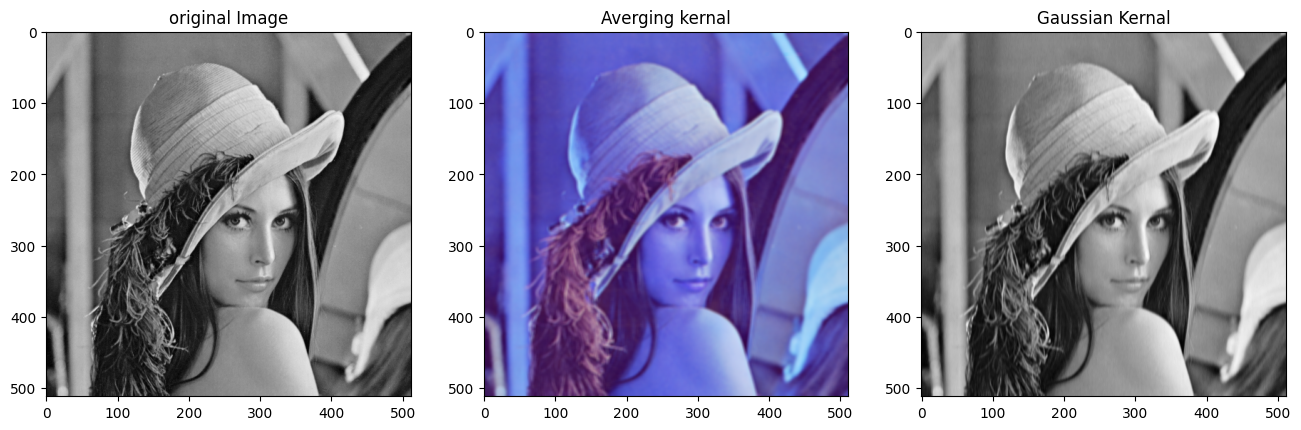

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.title('original Image')
plt.imshow(gray,cmap = 'gray')
plt.subplot(1,3,2)
plt.title('Averging kernal')
plt.imshow(smoothed_image,cmap = 'gray')
plt.subplot(1,3,3)
plt.title('Gaussian Kernal')
plt.imshow(blurred,cmap = 'gray')


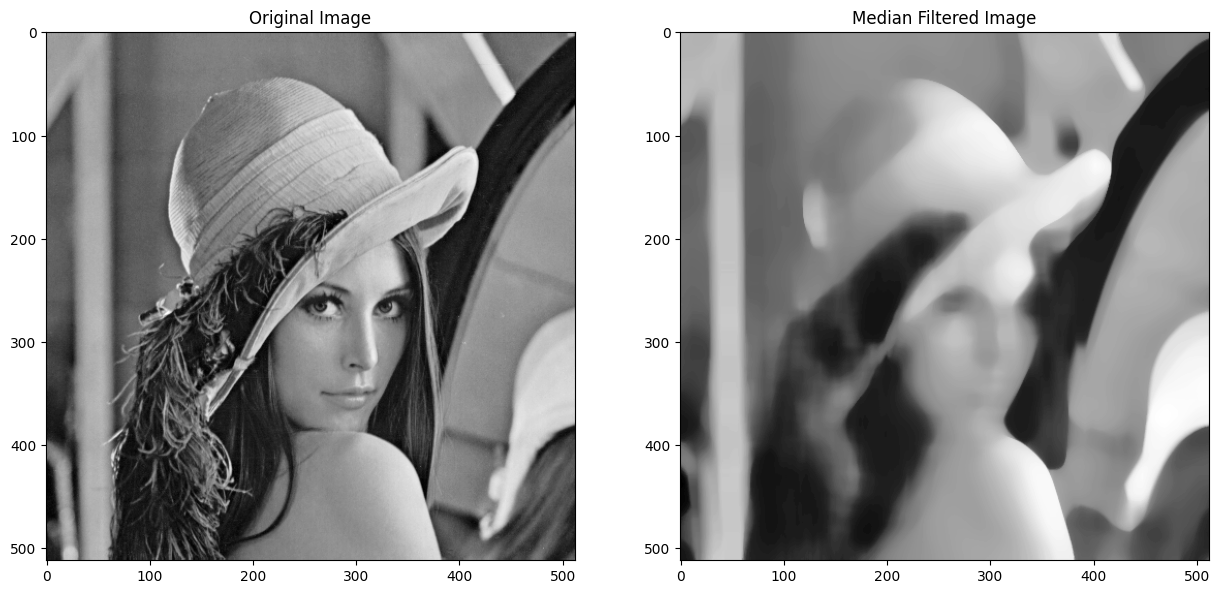

In [19]:
kernel_size = 31
median = cv2.medianBlur(gray,kernel_size)
plt.figure(figsize=(15,8))
plt.subplot(121),plt.imshow(gray,cmap='gray'),plt.title("Original Image")
plt.subplot(122),plt.imshow(median, cmap='gray'),plt.title("Median Filtered Image")
plt.show()

In [29]:
kernel_size = 21
median = cv2.medianBlur(image,kernel_size)
plt.figure(figsize=(15,8))

new_img = np.hstack([image,median])
cv2.imshow("Final",new_img)
new_img = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
plt.imsave("blur.jpg",new_img)
cv2.imwrite("bl_img.jpg",new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


<Figure size 1500x800 with 0 Axes>

In [28]:
cv2.imshow('Original',image)
cv2.imshow('smoothed',smoothed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Bilateral Filter

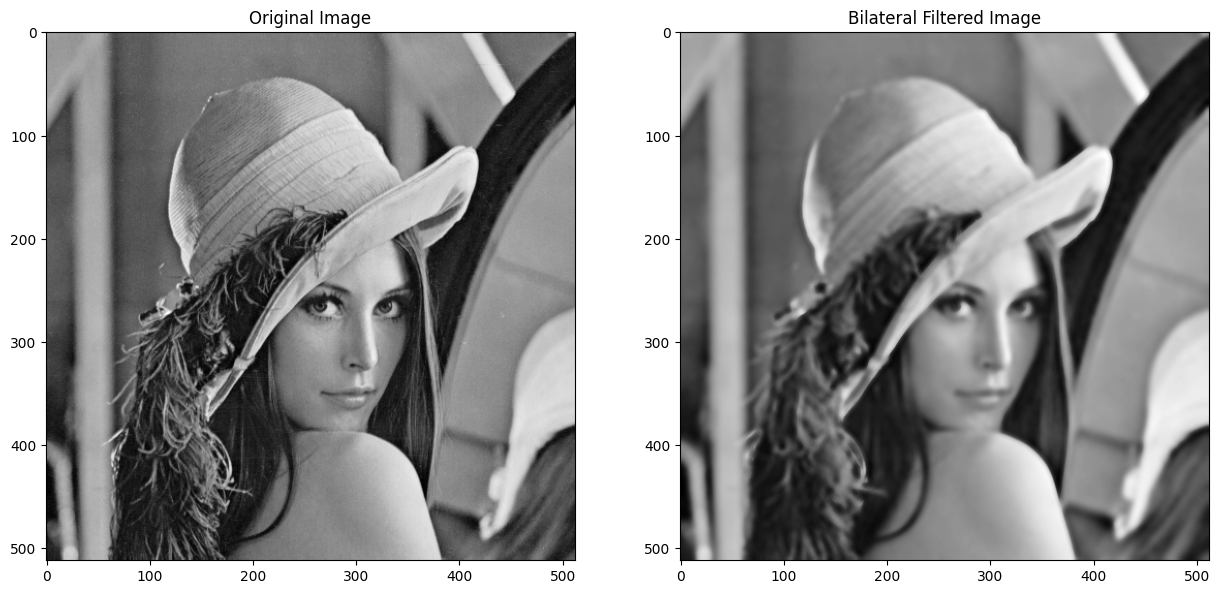

In [38]:
import cv2
import numpy as np

image = cv2.imread('lenna.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

bilateral = cv2.bilateralFilter(gray,d=9,sigmaColor=100,sigmaSpace=120) # adjust parameter

plt.figure(figsize=(15,8))
plt.subplot(121),plt.imshow(gray,cmap='gray'),plt.title("Original Image")
plt.subplot(122),plt.imshow(bilateral, cmap='gray'),plt.title("Bilateral Filtered Image")
plt.show()


In [53]:
kernel_size = 21
image = cv2.imread('lenna.png')
kernal = cv2.getGaussianKernel(kernal_size,sigma)
blurred = cv2.filter2D(image,-1,kernal)
median = cv2.medianBlur(image,kernel_size)
bilateral = cv2.bilateralFilter(image,d=9,sigmaColor=100,sigmaSpace=120)
plt.figure(figsize=(10,5))

new_img = np.hstack([image,blurred])
new_img1 = np.hstack([median,bilateral])
new = np.vstack([new_img,new_img1])
cv2.imshow("Final",new)

new_img = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
plt.imsave("blur.jpg",new_img)
cv2.imwrite("bl_img.jpg",new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


<Figure size 1000x500 with 0 Axes>